<a href="https://colab.research.google.com/github/pachperdev/autogradRegresionLineal/blob/main/ProyectoAutograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

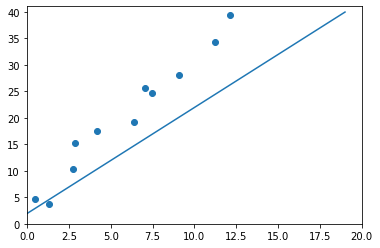

2.918297290802002 <built-in method item of Tensor object at 0x7f03fe26fef0>


In [7]:
# Regresion lineal con Autograd
# Este algorimo tiene la fucionalidad de generar datos aleatorios y predecir el comportamento futuro para la datos de entrada.
# los datos aleatorios se representan con puntos y el el programa hace un calculo de la aproximacion estimada.
#link Google Colab: https://colab.research.google.com/drive/1-2P9E2AjZkcoG5AE4cU3-5_laEMNoxkj?usp=sharing
# importamos librerias(Autograd, Matplot, Pytorch, etc)
from __future__ import print_function
import torch as t
from torch.autograd import Variable as V
from torch.autograd import Function
from matplotlib import pyplot as plt
from IPython import display

t.manual_seed(1000)  # numero aleatorio de maquinas ejecutandose


def get_fake_data(batch_size=8):  # datos fake
    # Generar datos aleatorios
    x = t.rand(batch_size, 1) * 20
    y = x * 3 + (1 + t.randn(batch_size, 1)) * 2
    return x, y


# Grafico de la funcion generada
x, y = get_fake_data()
plt.scatter(x.squeeze().numpy(), y.squeeze().numpy())
plt.show()

# Parámetros iniciales aleatorios
w = V(t.rand(1, 1), requires_grad=True)
b = V(t.zeros(1, 1), requires_grad=True)

lr = 0.001  # delta learning

for ii in range(8000):
    x, y = get_fake_data()
    x, y = V(x), V(y)

    y_pred = x.mm(w) + b.expand_as(y)
    loss = 0.5 * (y_pred - y) ** 2
    loss = loss.sum()

    loss.backward()

    w.data.sub_(lr * w.grad.data)
    b.data.sub_(lr * b.grad.data)

    w.grad.data.zero_()
    b.grad.data.zero_()

    if ii % 1000 == 0:
        # Graficar
        display.clear_output(wait=True)
        x = t.arange(0, 20).view(-1, 1)
        y = x.mm(w.data.long()) + b.data.expand_as(x)
        # Estimada
        plt.plot(x.numpy(), y.numpy())

        x2, y2 = get_fake_data(batch_size=20)
        # graf data
        plt.scatter(x2.numpy(), y2.numpy())

        plt.xlim(0, 20)
        plt.ylim(0, 41)
        plt.show()
        plt.pause(0.5)
print(w.data.squeeze().item(), b.data.squeeze().item)
# link Google Colab: https://colab.research.google.com/drive/1-2P9E2AjZkcoG5AE4cU3-5_laEMNoxkj?usp=sharing
# Tomado y adaptado por Mauricio Pacheco
# GitGub: pachperdev
